<a href="https://colab.research.google.com/github/Batmanab/Doobles/blob/master/DS1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [141]:
air_reserve = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/air_reserve.csv')
hpg_reserve = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/hpg_reserve.csv')
air_store_info = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/air_store_info.csv')
air_visit_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/air_visit_data.csv')
store_id_relation = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/store_id_relation.csv')


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


####Question 1

In [80]:
air_reserve['year'] = pd.to_datetime(air_reserve['visit_datetime']).dt.year
hpg_reserve['year'] = pd.to_datetime(hpg_reserve['visit_datetime']).dt.year

In [85]:
new_air_reserve = air_reserve.loc[air_reserve.year ==2016]
new_air_reserve = new_air_reserve.drop(['year'],axis =1)


In [89]:
new_hpg_reserve = hpg_reserve.loc[hpg_reserve.year ==2016]
new_hpg_reserve = new_hpg_reserve.drop(['year'],axis =1)

In [87]:
new_air_reserve.head(10)



,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,new_store_name
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,_877f79706adbfb06
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3,_db4b38ebe7a7ceff
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6,_db4b38ebe7a7ceff
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,_877f79706adbfb06
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5,_db80363d35f10926
5,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 16:00:00,2,_db80363d35f10926
6,air_db80363d35f10926,2016-01-02 01:00:00,2016-01-01 15:00:00,4,_db80363d35f10926
7,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-02 14:00:00,2,_3bb99a1fe0583897
8,air_3bb99a1fe0583897,2016-01-02 16:00:00,2016-01-01 20:00:00,2,_3bb99a1fe0583897
9,air_2b8b29ddfd35018e,2016-01-02 17:00:00,2016-01-02 17:00:00,2,_2b8b29ddfd35018e


In [90]:
new_hpg_reserve.head(10)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,new_store_name
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,_c63f6f42e088e50f
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,_dac72789163a3f47
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,_c8e24dcf51ca1eb5
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,_24bb207e5fd49d4a
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,_25291c542ebb3bc2
5,hpg_28bdf7a336ec6a7b,2016-01-01 17:00:00,2016-01-01 15:00:00,2,_28bdf7a336ec6a7b
6,hpg_2a01a042bca04ad9,2016-01-01 17:00:00,2016-01-01 17:00:00,2,_2a01a042bca04ad9
7,hpg_2a84dd9f4c140b82,2016-01-01 17:00:00,2016-01-01 15:00:00,2,_2a84dd9f4c140b82
8,hpg_2ad179871696901f,2016-01-01 17:00:00,2016-01-01 13:00:00,2,_2ad179871696901f
9,hpg_2c1d989eedb0ff83,2016-01-01 17:00:00,2016-01-01 15:00:00,6,_2c1d989eedb0ff83


In [10]:
air_reserve['new_store_name'] = air_reserve['air_store_id'].map(lambda x: x.lstrip('air'))
hpg_reserve['new_store_name']= hpg_reserve['hpg_store_id'].map(lambda x: x.lstrip('hpg'))


In [11]:
air_reserve.groupby('new_store_name')['reserve_visitors'].agg(['sum'])

,sum
new_store_name,
_00a91d42b08b08d9,70
_0164b9927d20bcc3,517
_034a3d5b40d5b1b1,93
_03963426c9312048,8200
_04341b588bde96cd,208
...,...
_fcfbdcf7b1f82c6e,333
_fdc02ec4a3d21ea4,166
_fe22ef5a9cbef123,1393


In [12]:
hpg_reserve.groupby('new_store_name')['reserve_visitors'].agg(['sum'])

,sum
new_store_name,
_001112ef76b9802c,261
_001ce40a1f873e4f,821
_001f8de5120ce935,1510
_0023b061a9f3279a,476
_0025a7a2ddb76a01,177
...,...
_ffe96ca8c6ec10cf,1286
_fff8ec9cb3710638,280
_fffa3b36bc525136,228


In [13]:
store_id_relation.head(10)

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7
5,air_a38f25e3399d1b25,hpg_50378da9ffb9b6cd
6,air_3c938075889fc059,hpg_349b1b92f98b175e
7,air_68301bcb11e2f389,hpg_2c09f3abb2220659
8,air_5f6fa1b897fe80d5,hpg_40aff6385800ebb1
9,air_00a91d42b08b08d9,hpg_fbe603376b5980fc


In [14]:
store_id_relation.shape


(150, 2)

In [91]:
newHpg = new_hpg_reserve.groupby(['hpg_store_id'])['reserve_visitors'].agg('sum').to_frame('customer').reset_index()


In [92]:
newHpg.head(10)


,hpg_store_id,customer
0,hpg_001112ef76b9802c,150
1,hpg_001ce40a1f873e4f,528
2,hpg_001f8de5120ce935,960
3,hpg_0023b061a9f3279a,308
4,hpg_0025a7a2ddb76a01,91
5,hpg_0025b2edb92f1a37,241
6,hpg_0025da1a9a15ce7a,421
7,hpg_0034f74a25be3cbe,1654
8,hpg_00394a75a35c427c,613
9,hpg_00418591affd6f00,925


In [93]:
newAir = new_air_reserve.groupby(['air_store_id'])['reserve_visitors'].agg('sum').to_frame('customer').reset_index()


In [94]:
newAir.head(10)


,air_store_id,customer
0,air_00a91d42b08b08d9,35
1,air_0164b9927d20bcc3,166
2,air_034a3d5b40d5b1b1,13
3,air_03963426c9312048,4981
4,air_04341b588bde96cd,208
5,air_04cae7c1bc9b2a0b,1078
6,air_066f0221b8a4d533,299
7,air_082908692355165e,237
8,air_084d98859256acf0,8
9,air_0867f7bebad6a649,558


In [95]:
index=0
for stid in store_id_relation.air_store_id.values:
  #print(stid)
  # print(newAir.loc[newAir.air_store_id == stid]['customer'].values[0])
  if stid in newAir.air_store_id.values:
    store_id_relation.at[index,'customer_count_air']= newAir.loc[newAir.air_store_id == stid]['customer'].values[0]
  else:
    store_id_relation.at[index,'customer_count_air']=0


  # a_id = store_id_relation.iloc[id_n].air_store_id
  
  # break
  index += 1
 
  

In [65]:
store_id_relation= store_id_relation.drop(['customer_count_air'],axis =1)

In [98]:
store_id_relation.head(10)


,air_store_id,hpg_store_id,customer_count_air,customer_count_hpg
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a,0.0,1964.0
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809,700.0,1310.0
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9,486.0,199.0
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8,0.0,1206.0
4,air_965b2e0cf4119003,hpg_653238a84804d8e7,536.0,246.0
5,air_a38f25e3399d1b25,hpg_50378da9ffb9b6cd,1394.0,809.0
6,air_3c938075889fc059,hpg_349b1b92f98b175e,1101.0,1382.0
7,air_68301bcb11e2f389,hpg_2c09f3abb2220659,13.0,197.0
8,air_5f6fa1b897fe80d5,hpg_40aff6385800ebb1,1456.0,1420.0
9,air_00a91d42b08b08d9,hpg_fbe603376b5980fc,35.0,337.0


In [97]:
index=0
for stid in store_id_relation.hpg_store_id.values:
  #print(stid)
  # print(newAir.loc[newAir.air_store_id == stid]['customer'].values[0])
  if stid in newHpg.hpg_store_id.values:
    store_id_relation.at[index,'customer_count_hpg']= newHpg.loc[newHpg.hpg_store_id == stid]['customer'].values[0]
  else:
    store_id_relation.at[index,'customer_count_hpg']=0


  # a_id = store_id_relation.iloc[id_n].air_store_id
  
  # break
  index += 1

In [99]:
store_id_relation.to_csv("/content/drive/My Drive/Colab Notebooks/Data/q1.csv")


In [101]:
air_sum = store_id_relation.customer_count_air.sum()

In [103]:
hpg_sum = store_id_relation.customer_count_hpg.sum()

87381.0

In [109]:
new_df = pd.DataFrame()
new_df.at[0,"type"] = "air_sum"
new_df.at[0,"value"] = air_sum
new_df.at[1,"type"] = "hpg_sum"
new_df.at[1,"value"] = hpg_sum



In [110]:
new_df.head

<bound method NDFrame.head of       type    value
0  air_sum  79342.0
1  hpg_sum  87381.0>

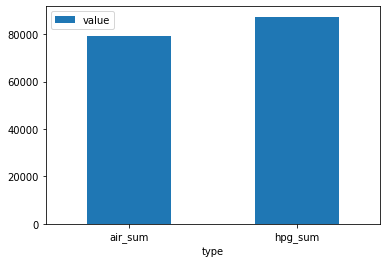

In [111]:
new_df.plot.bar(x="type", y="value", rot=0)

### Question 2

In [123]:
air_store_info.head(5)

,air_store_id,air_genre_name,air_area_name,latitude,longitude,type
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Italian/French
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Italian/French
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Italian/French
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Italian/French
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Italian/French


In [127]:
air_store_info.type.value_counts()

Asian                    299
International cuisine    196
Bar/Cocktail             189
Western food             118
Other                     27
Name: type, dtype: int64

In [219]:
air_store_info["type"] = air_store_info['air_genre_name']

In [122]:
air_store_info= air_store_info.drop(['Type'],axis =1)

In [220]:
air_store_info['type']= air_store_info['type'].replace({'Italian/French':'Western food', 'Izakaya':'Asian', 'Japanese food': 'Asian', 
                                "Yakiniku/Korean food":'Asian',"Okonomiyaki/Monja/Teppanyaki":"Asian",
                                "Dining bar":"Bar/Cocktail", "Karaoke/Party":"Bar/Cocktail", "Cafe/Sweets":"International cuisine",
                                "Creative cuisine":"International cuisine"})


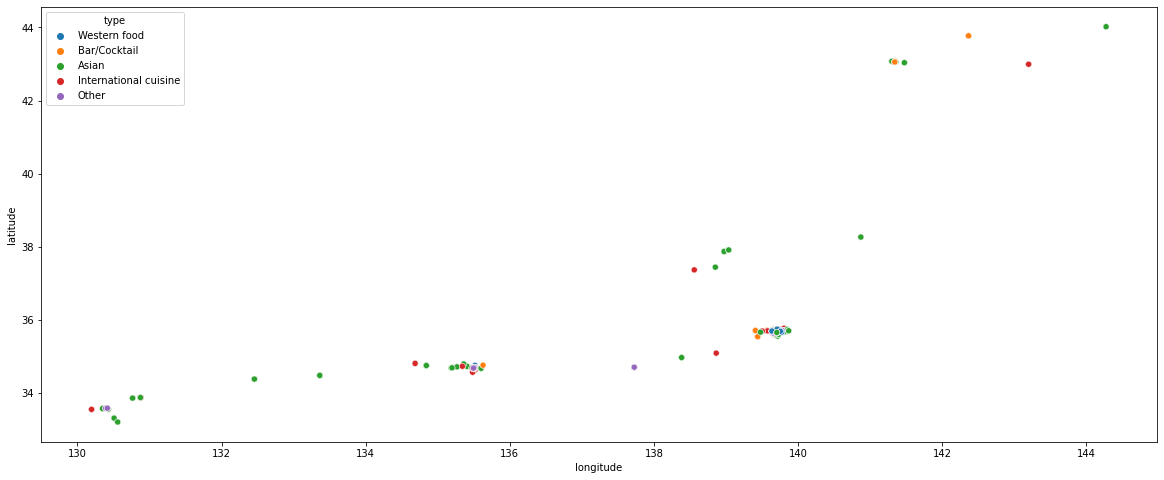

In [140]:
plt.figure(figsize=(20,8))
# plt.scatter(x=air_store_info['longitude'], y=air_store_info['latitude'])
sns.scatterplot(data=air_store_info, x= 'longitude', y= 'latitude', hue= 'type')
plt.show()

###Question 3

In [165]:
air_visit_data.head(10)


,air_store_id,visit_date,visitors,month,Year,Month_Year
0,air_ba937bf13d40fb24,2016-01-13,25,January,2016,January 2016
1,air_ba937bf13d40fb24,2016-01-14,32,January,2016,January 2016
2,air_ba937bf13d40fb24,2016-01-15,29,January,2016,January 2016
3,air_ba937bf13d40fb24,2016-01-16,22,January,2016,January 2016
4,air_ba937bf13d40fb24,2016-01-18,6,January,2016,January 2016
5,air_ba937bf13d40fb24,2016-01-19,9,January,2016,January 2016
6,air_ba937bf13d40fb24,2016-01-20,31,January,2016,January 2016
7,air_ba937bf13d40fb24,2016-01-21,21,January,2016,January 2016
8,air_ba937bf13d40fb24,2016-01-22,18,January,2016,January 2016
9,air_ba937bf13d40fb24,2016-01-23,26,January,2016,January 2016


In [148]:
air_visit_data.shape

(252108, 3)

In [146]:
air_visit_data.air_store_id.nunique()

829

In [150]:
air_visit_data['month'] = pd.to_datetime(air_visit_data['visit_date']).dt.month

In [161]:
air_visit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
 3   month         252108 non-null  object
 4   Year          252108 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 9.6+ MB


In [156]:
air_visit_data['Year'] = pd.to_datetime(air_visit_data['visit_date']).dt.year

In [154]:
air_visit_data['month']= air_visit_data['month'].replace({1:'January', 2:"February", 3:"March", 4:"April",
                                                          5:"May",6:"June", 7:"July", 8:"August", 9:"September",
                                                          10: "October", 11:"November", 12:"December"})

In [164]:
air_visit_data["Month_Year"] = air_visit_data.month + " " + air_visit_data.Year.astype(str)

In [178]:
newAir_visit_data = air_visit_data.groupby(['Month_Year'])['visitors'].agg('mean').to_frame('mean_visitors').reset_index()

In [177]:
newAir_visit_data.head(10)

,Month_Year,mean_visitors
0,January 2016,22.533317
1,April 2017,21.448066
2,August 2016,19.748489
3,December 2016,23.128840
4,February 2016,21.032877
5,February 2017,20.264600
6,January 2016,20.891257
7,January 2017,19.636954
8,July 2016,21.267653
9,June 2016,21.319510


In [170]:
newAir_visit_data.shape


(16, 2)

In [182]:
newAVD = pd.DataFrame()
newAVD.at[0,'Month_Year']= "January 2016"
newAVD.at[0,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="January 2016"]["mean_visitors"].values[0]

newAVD.at[1,'Month_Year']= "February 2016"
newAVD.at[1,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="February 2016"]["mean_visitors"].values[0]

newAVD.at[2,'Month_Year']= "March 2016"
newAVD.at[2,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="March 2016"]["mean_visitors"].values[0]

newAVD.at[3,'Month_Year']= "April 2016"
newAVD.at[3,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="April 2016"]["mean_visitors"].values[0]

newAVD.at[4,'Month_Year']= "May 2016"
newAVD.at[4,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="May 2016"]["mean_visitors"].values[0]

newAVD.at[5,'Month_Year']= "June 2016"
newAVD.at[5,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="June 2016"]["mean_visitors"].values[0]

newAVD.at[6,'Month_Year']= "July 2016"
newAVD.at[6,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="July 2016"]["mean_visitors"].values[0]

newAVD.at[7,'Month_Year']= "August 2016"
newAVD.at[7,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="August 2016"]["mean_visitors"].values[0]

newAVD.at[8,'Month_Year']= "September 2016"
newAVD.at[8,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="September 2016"]["mean_visitors"].values[0]

newAVD.at[9,'Month_Year']= "October 2016"
newAVD.at[9,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="October 2016"]["mean_visitors"].values[0]

newAVD.at[10,'Month_Year']= "November 2016"
newAVD.at[10,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="November 2016"]["mean_visitors"].values[0]

newAVD.at[11,'Month_Year']= "December 2016"
newAVD.at[11,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="December 2016"]["mean_visitors"].values[0]

newAVD.at[12,'Month_Year']= "January 2017"
newAVD.at[12,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="January 2017"]["mean_visitors"].values[0]

newAVD.at[13,'Month_Year']= "February 2017"
newAVD.at[13,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="February 2017"]["mean_visitors"].values[0]

newAVD.at[14,'Month_Year']= "March 2017"
newAVD.at[14,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="March 2017"]["mean_visitors"].values[0]

newAVD.at[15,'Month_Year']= "April 2017"
newAVD.at[15,'mean_visitors']= newAir_visit_data.loc[newAir_visit_data.Month_Year=="April 2017"]["mean_visitors"].values[0]





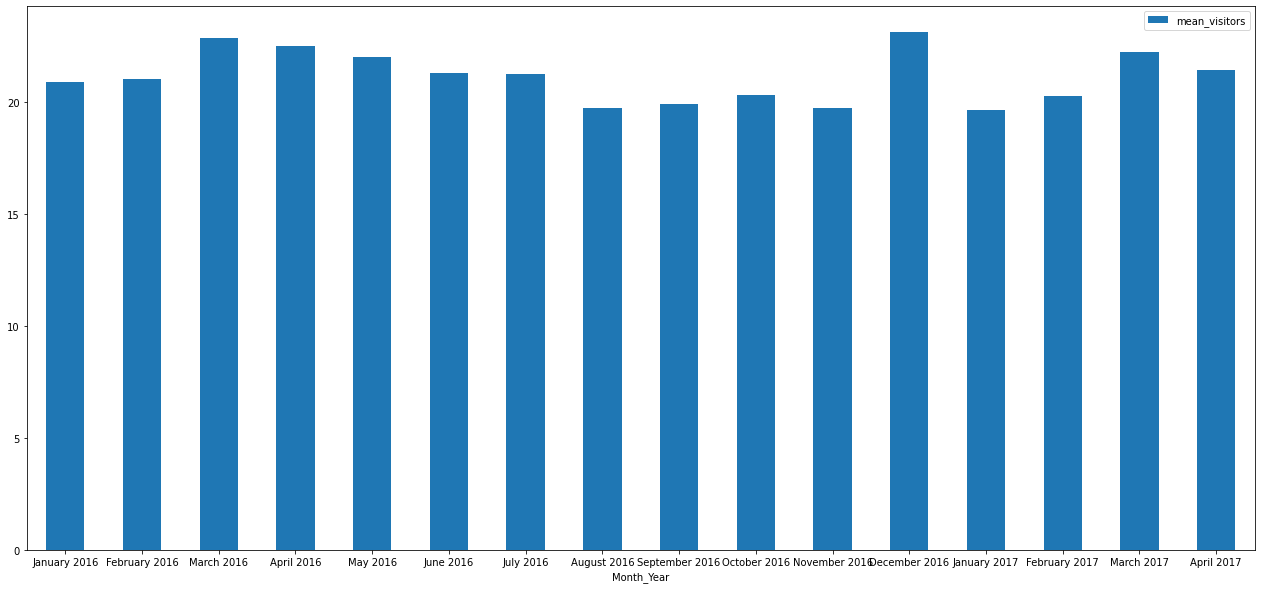

In [191]:


newAVD.plot.bar(x='Month_Year', y="mean_visitors",rot=0,figsize=(22,10))
plt.show()

###Question4

In [199]:
hpg_reserve.head(10)


,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors,day
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1,Friday
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3,Friday
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2,Friday
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5,Friday
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13,Friday
5,hpg_28bdf7a336ec6a7b,2016-01-01 17:00:00,2016-01-01 15:00:00,2,Friday
6,hpg_2a01a042bca04ad9,2016-01-01 17:00:00,2016-01-01 17:00:00,2,Friday
7,hpg_2a84dd9f4c140b82,2016-01-01 17:00:00,2016-01-01 15:00:00,2,Friday
8,hpg_2ad179871696901f,2016-01-01 17:00:00,2016-01-01 13:00:00,2,Friday
9,hpg_2c1d989eedb0ff83,2016-01-01 17:00:00,2016-01-01 15:00:00,6,Friday


In [195]:
hpg_reserve["day"] = pd.to_datetime(hpg_reserve.visit_datetime).dt.dayofweek

In [198]:
hpg_reserve['day']= hpg_reserve['day'].replace({0:'Monday', 1:"Tuesday", 2:"Wednesday", 3:"Thursday",
                                                          4:"Friday",5:"Saturday", 6:"Sunday"})

In [200]:
newHPGr = hpg_reserve.groupby(['day'])['reserve_visitors'].agg('sum').to_frame('total_visitors').reset_index()

In [203]:
newHPGr.head(7)


,day,total_visitors
0,Friday,2658732
1,Monday,813931
2,Saturday,2286390
3,Sunday,1015486
4,Thursday,1224419
5,Tuesday,932183
6,Wednesday,1218052


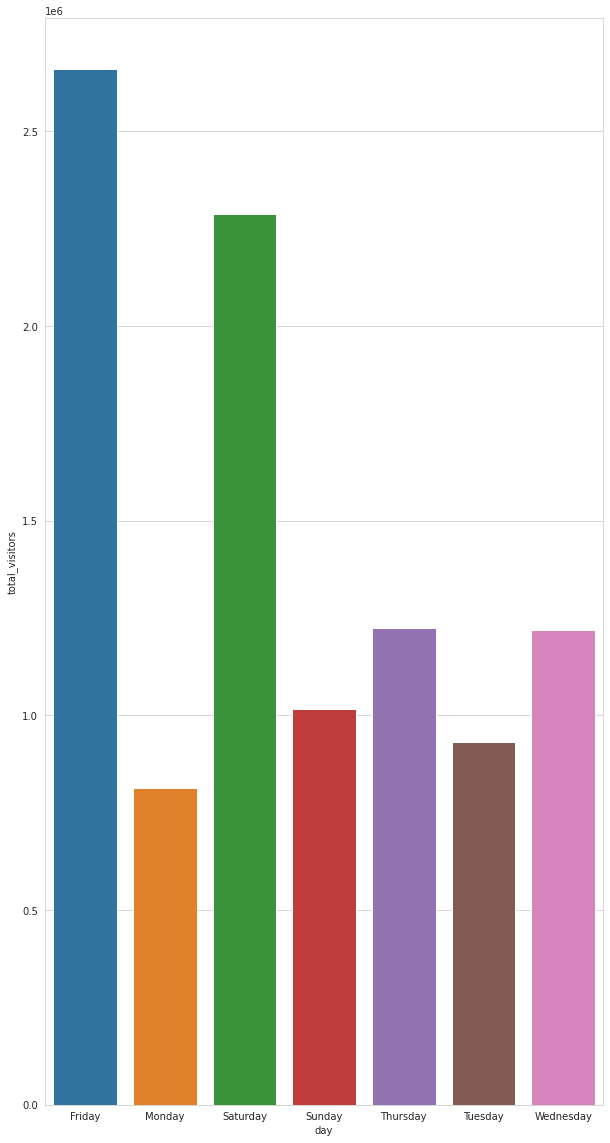

In [206]:
plt.figure(figsize=(10,20))
sns.set_style("whitegrid")

sns.barplot(x="day", y = "total_visitors" , data = newHPGr)

###Question 5


In [214]:
air_reserve.tail()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
92373,air_db4b38ebe7a7ceff,2017-05-29 18:00:00,2017-04-17 19:00:00,6
92374,air_1033310359ceeac1,2017-05-30 23:00:00,2017-04-19 17:00:00,8
92375,air_877f79706adbfb06,2017-05-31 20:00:00,2017-04-12 23:00:00,3
92376,air_900d755ebd2f7bbd,2017-05-31 20:00:00,2017-04-19 16:00:00,10
92377,air_3cad29d1a23209d2,2017-05-31 21:00:00,2017-04-22 10:00:00,3


In [221]:
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude,type
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Western food
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Western food
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Western food
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852,Western food
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599,Western food


In [222]:
x = air_store_info[["air_store_id","type"]]


In [229]:
(pd.to_datetime(air_reserve.visit_datetime) - pd.to_datetime(air_reserve.reserve_datetime)).astype("timedelta64[h]")

0           3.0
1           0.0
2           0.0
3           4.0
4          19.0
          ...  
92373    1007.0
92374     990.0
92375    1173.0
92376    1012.0
92377     947.0
Length: 92378, dtype: float64

In [226]:
air_reserve.shape, air_store_info.shape, final.shape

((92378, 4), (829, 6), (92378, 5))

In [223]:
final = pd.merge(air_reserve,x,on="air_store_id")

In [231]:
final.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,type,time_difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Asian,3.0
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Asian,4.0
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Asian,26.0
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Asian,29.0
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Asian,97.0


In [230]:
final['time_difference'] = (pd.to_datetime(final.visit_datetime) - pd.to_datetime(final.reserve_datetime)).astype("timedelta64[h]")

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


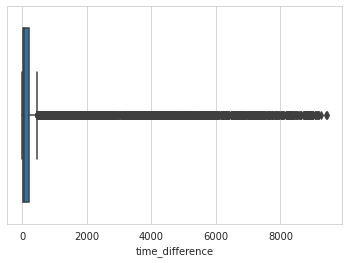

In [232]:
sns.boxplot(final['time_difference'])

In [233]:
final.describe()

,reserve_visitors,time_difference
count,92378.000000,92378.000000
mean,4.481749,199.097512
std,4.919669,615.662749
min,1.000000,0.000000
25%,2.000000,5.000000
50%,3.000000,50.000000
75%,5.000000,189.000000
max,100.000000,9435.000000


In [234]:
newFinal = final[final.time_difference<=200]

In [236]:
newFinal.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors,type,time_difference
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1,Asian,3.0
1,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2,Asian,4.0
2,air_877f79706adbfb06,2016-01-02 18:00:00,2016-01-01 16:00:00,2,Asian,26.0
3,air_877f79706adbfb06,2016-01-02 21:00:00,2016-01-01 16:00:00,2,Asian,29.0
4,air_877f79706adbfb06,2016-01-08 21:00:00,2016-01-04 20:00:00,2,Asian,97.0


In [237]:
newFinal2 = newFinal.groupby(['type'])['time_difference'].agg('mean').to_frame('average_time').reset_index()

In [240]:
newFinal2.head(10)

,type,average_time
0,Asian,49.541402
1,Bar/Cocktail,57.726388
2,International cuisine,48.159263
3,Other,38.478743
4,Western food,45.448593


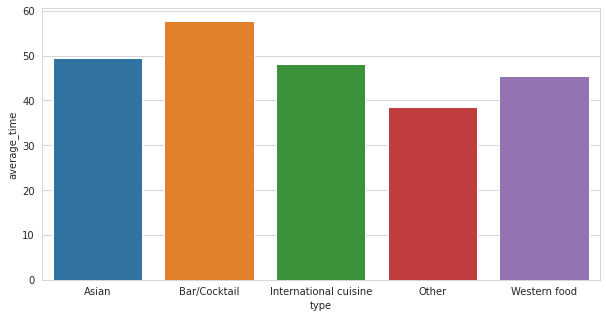

In [242]:
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")

sns.barplot(x="type", y = "average_time" , data = newFinal2)